In [3]:
pip install wordcloud


   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/299.9 kB 640.0 kB/s eta 0:00:01
   -- ------------------------------------ 20.5/299.9 kB 640.0 kB/s eta 0:00:01
   -- ------------------------------------ 20.5/299.9 kB 640.0 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/299.9 kB 196.9 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/299.9 kB 233.8 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/299.9 kB 233.8 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/299.9 kB 233.8 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/299.9 kB 233.8 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/299.9 kB 233.8 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/299.9 kB 233.8 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/299.9 kB 143.4 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/2


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os

# Paths
INPUT_PATH = r"data/processed/task2/reviews_with_themes.csv"
OUTPUT_DIR = r"data/processed/task2/analysis_outputs/"

# Create output directory
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Set Seaborn style for plots
sns.set(style="whitegrid")


Load the preprocessed review data with sentiment labels and identified themes.

In [9]:
df = pd.read_csv(r"C:\Users\THINKPAD\Desktop\10_Academy\Week_2\data\processed\task2\reviews_with_themes.csv")
df.head(10)


,review_text,rating,review_date,bank_name,source,sentiment_score,sentiment_label,identified_themes
0,CBE ይለያል።,5,2025-11-29,Commercial Bank of Ethiopia,Google Play,0.0000,NEUTRAL,Other
1,it's special for me,5,2025-11-29,Commercial Bank of Ethiopia,Google Play,0.4019,POSITIVE,Other
2,Make it user friendly.,2,2025-11-29,Commercial Bank of Ethiopia,Google Play,0.4939,POSITIVE,Other
3,maaliif daddafee install gaafata,3,2025-11-28,Commercial Bank of Ethiopia,Google Play,0.0000,NEUTRAL,Other
4,good app,5,2025-11-28,Commercial Bank of Ethiopia,Google Play,0.4404,POSITIVE,Other
5,This application is very important and advanta...,5,2025-11-27,Commercial Bank of Ethiopia,Google Play,0.5198,POSITIVE,Transaction Performance
6,why didn't work this app?,1,2025-11-27,Commercial Bank of Ethiopia,Google Play,0.0000,NEUTRAL,Other
7,The app makes our life easier. Thank you CBE!,5,2025-11-27,Commercial Bank of Ethiopia,Google Play,0.6800,POSITIVE,Other
8,this app very bad 👎,1,2025-11-27,Commercial Bank of Ethiopia,Google Play,-0.5849,NEGATIVE,Other
9,the most advanced app. but how to stay safe?,5,2025-11-27,Commercial Bank of Ethiopia,Google Play,0.6701,POSITIVE,Other


Sentiment Summary

Count reviews per sentiment label for each bank and calculate average sentiment scores.

In [4]:
# Count of reviews per sentiment per bank
sentiment_summary = df.groupby(['bank_name', 'sentiment_label']).size().reset_index(name='count')
display(sentiment_summary)

# Average sentiment score per bank
avg_sentiment = df.groupby('bank_name')['sentiment_score'].mean().reset_index()
display(avg_sentiment)

# Optionally save summaries
sentiment_summary.to_csv(f"{OUTPUT_DIR}sentiment_summary.csv", index=False)
avg_sentiment.to_csv(f"{OUTPUT_DIR}avg_sentiment_per_bank.csv", index=False)


,bank_name,sentiment_label,count
0,Bank of Abyssinia,NEGATIVE,77
1,Bank of Abyssinia,NEUTRAL,136
2,Bank of Abyssinia,POSITIVE,187
3,Commercial Bank of Ethiopia,NEGATIVE,31
4,Commercial Bank of Ethiopia,NEUTRAL,139
5,Commercial Bank of Ethiopia,POSITIVE,230
6,Dashen Bank,NEGATIVE,48
7,Dashen Bank,NEUTRAL,96
8,Dashen Bank,POSITIVE,256


,bank_name,sentiment_score
0,Bank of Abyssinia,0.137309
1,Commercial Bank of Ethiopia,0.263186
2,Dashen Bank,0.307496


Theme Summary

Count reviews per theme for each bank to understand recurring topics.

In [6]:
theme_summary = df.groupby(['bank_name', 'identified_themes']).size().reset_index(name='count')
display(theme_summary)

# Optionally save summary
theme_summary.to_csv(f"{OUTPUT_DIR}theme_summary.csv", index=False)


,bank_name,identified_themes,count
0,Bank of Abyssinia,Account Access Issues,6
1,Bank of Abyssinia,"Account Access Issues, Customer Support, User ...",1
2,Bank of Abyssinia,"Account Access Issues, Feature Requests, Trans...",1
3,Bank of Abyssinia,"Account Access Issues, Transaction Performance",3
4,Bank of Abyssinia,"Account Access Issues, User Interface & Experi...",1
5,Bank of Abyssinia,Customer Support,10
6,Bank of Abyssinia,"Customer Support, Transaction Performance",1
7,Bank of Abyssinia,"Customer Support, User Interface & Experience,...",1
8,Bank of Abyssinia,Feature Requests,6
9,Bank of Abyssinia,"Feature Requests, Customer Support",2


Sentiment Distribution
Compare the number of positive, negative, and neutral reviews per bank.

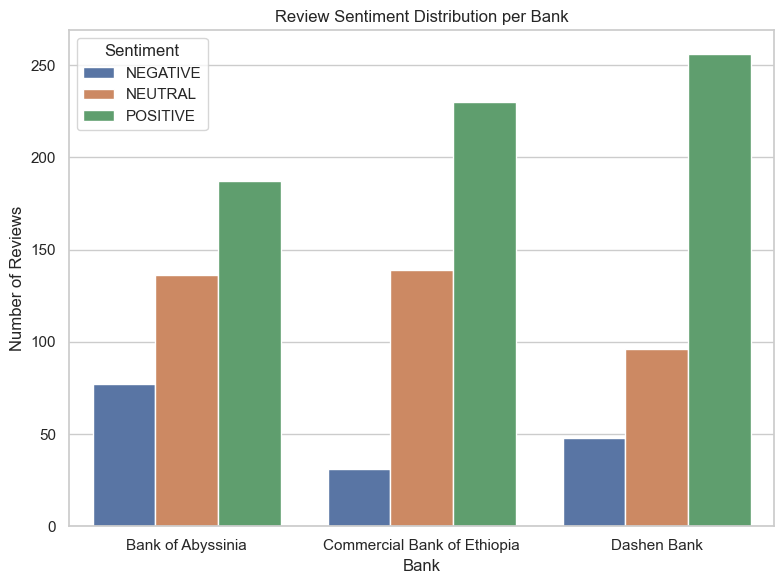

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=(8,6))
sns.barplot(x='bank_name', y='count', hue='sentiment_label', data=sentiment_summary)
plt.title("Review Sentiment Distribution per Bank")
plt.ylabel("Number of Reviews")
plt.xlabel("Bank")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

# Optional: save chart
plt.savefig(f"{OUTPUT_DIR}sentiment_bar_chart.png")


Theme Distribution


Visualize the proportion of each theme per bank.

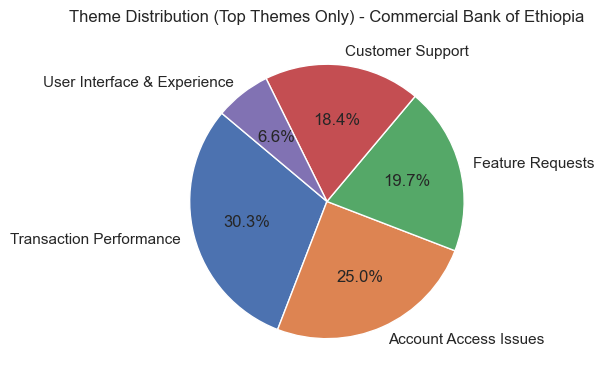

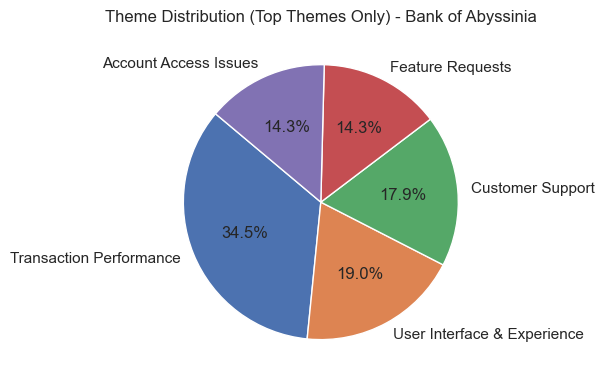

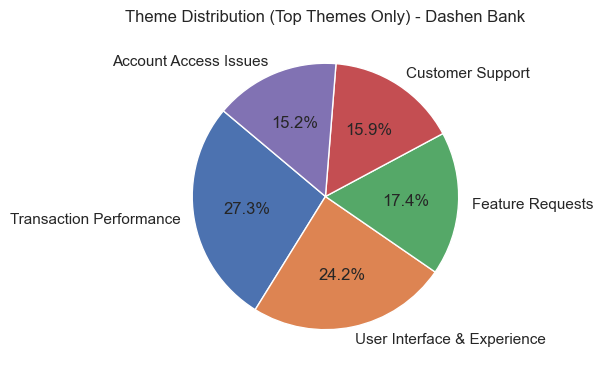

In [ ]:
for bank in df['bank_name'].unique():
    plt.figure(figsize=(6, 6))

    # Filter bank
    bank_df = df[df['bank_name'] == bank].copy()

    # Split comma-separated themes into lists
    bank_df['identified_themes'] = bank_df['identified_themes'].str.split(',')

    #  Explode into separate rows
    bank_df = bank_df.explode('identified_themes')

    # Clean spaces
    bank_df['identified_themes'] = bank_df['identified_themes'].str.strip()

    # Count themes
    bank_themes = bank_df['identified_themes'].value_counts()

    # Remove "Other"
    bank_themes = bank_themes[bank_themes.index.str.lower() != "other"]

    #  Keep Top 6 only
    bank_themes = bank_themes.head(6)

    #  Plot
    bank_themes.plot.pie(
        autopct='%1.1f%%',
        startangle=140
    )

    plt.title(f"Theme Distribution (Top Themes Only) - {bank}")
    plt.ylabel("")
    plt.tight_layout()

    #  Save before show
    plt.savefig(f"{OUTPUT_DIR}theme_pie_{bank.replace(' ', '_')}.png")

    plt.show()


Word Clouds – Themes



Generate word clouds for each theme to visualize frequently mentioned words.